In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
system_extraction_comparison = pd.read_csv("translations_scores/system_extraction_comparision_basic_metric.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


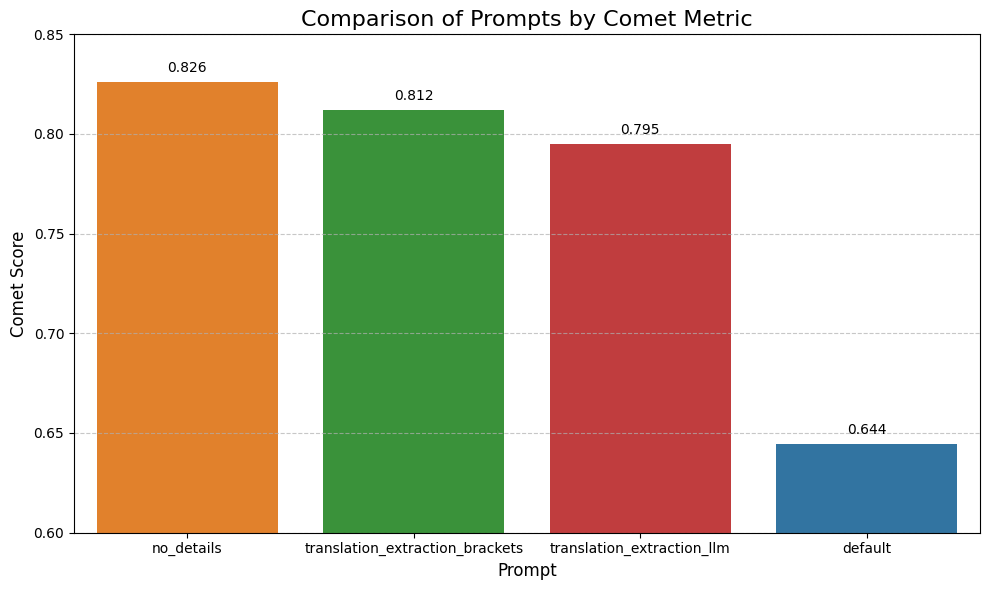

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


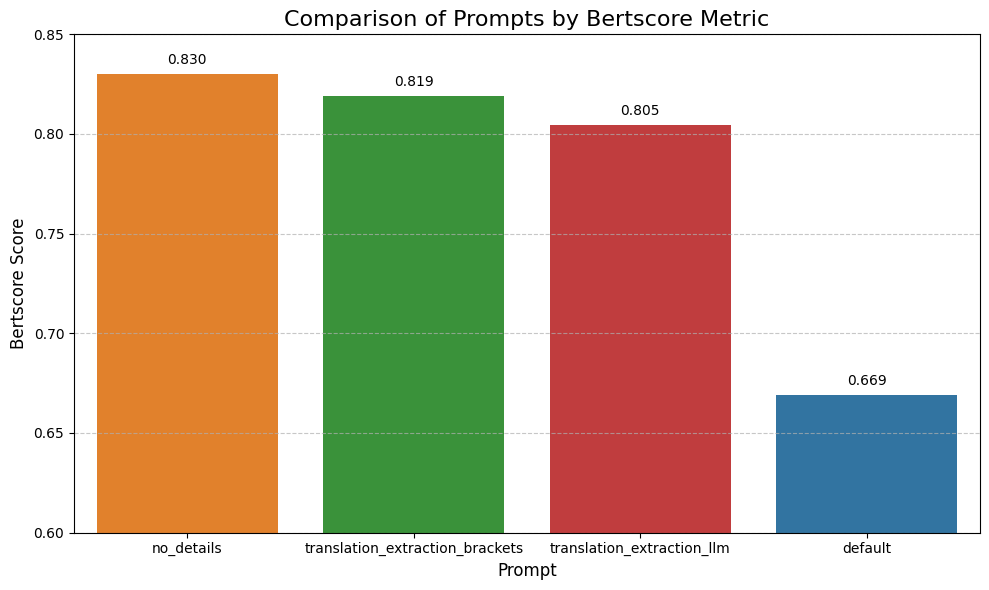

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


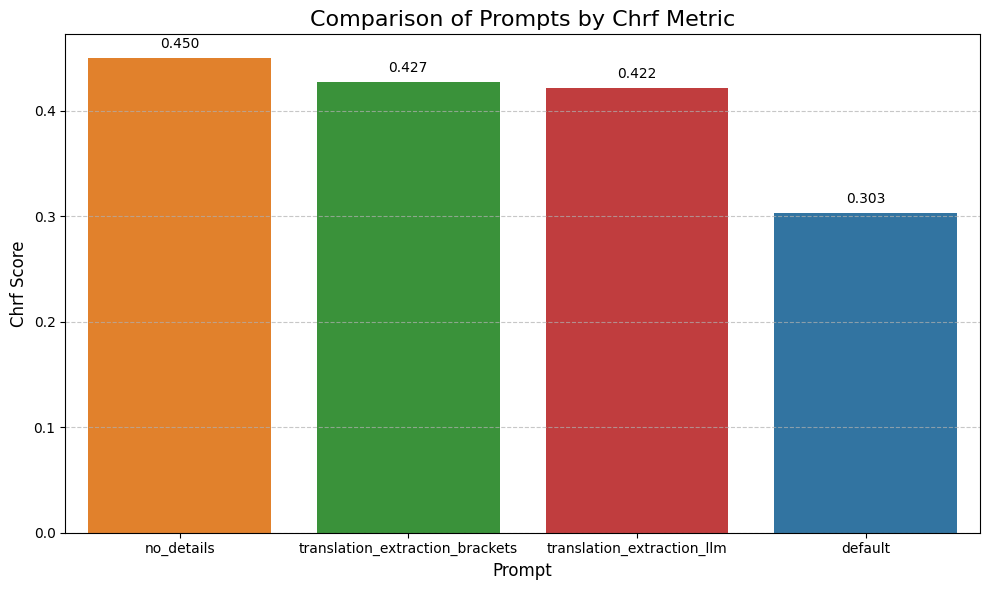

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


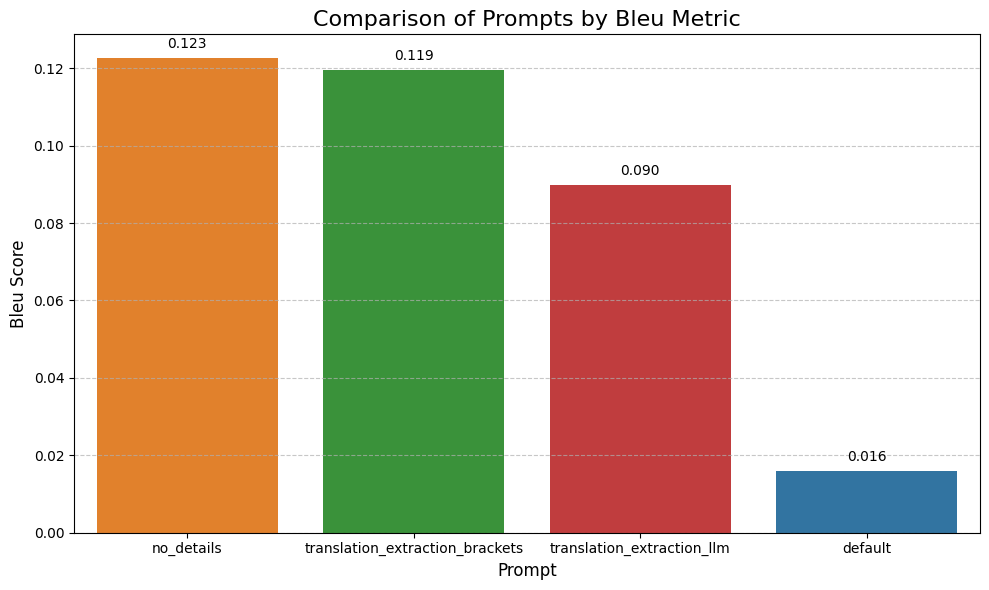

In [33]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_extraction_comparison[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [34]:
extraction_comparison = pd.read_csv("translations_scores/extraction_comparision_basic_metric.csv")

In [35]:
extraction_comparison

,en_text,pl_text,default,no_details,translation_extraction_llm,translation_extraction_brackets,chrf_default,bleu_default,bertscore_default,comet_default,...,bertscore_no_details,comet_no_details,chrf_translation_extraction_llm,bleu_translation_extraction_llm,bertscore_translation_extraction_llm,comet_translation_extraction_llm,chrf_translation_extraction_brackets,bleu_translation_extraction_brackets,bertscore_translation_extraction_brackets,comet_translation_extraction_brackets
0,So be it.,Niech będzie.,Tak niech będzie.\n\nTo tłumaczenie jest dosło...,Niech tak będzie.,Tak niech będzie.,Niech tak będzie.,0.340968,0.006472,0.651639,0.592616,...,0.947465,0.960410,0.863093,0.113622,0.928528,0.960357,0.673054,0.135120,0.947465,0.960410
1,A year now you've promised to write somethin' ...,"Od roku obiecujesz, że napiszesz piosnkę dla m...","Tłumaczenie na język polski:\n\n""Już rok obiec...",Już rok obiecujesz mi coś napisać.,"Już rok obiecujesz, że coś dla mnie napiszesz.","Minął już rok, odkąd obiecałeś napisać coś dla...",0.466684,0.015719,0.720068,0.600530,...,0.777357,0.765648,0.588339,0.065006,0.884018,0.872454,0.315999,0.050712,0.771817,0.838506
2,Freya watch over you.,Niech Freyja nad wami czuwa.,Tłumaczenie tego zdania na język polski brzmi:...,Freya czuwa nad tobą.,Freya czuwa nad tobą.,Freya czuwa nad tobą.,0.156949,0.003205,0.625985,0.656165,...,0.802811,0.930227,0.269908,0.062571,0.802811,0.930227,0.269908,0.062571,0.802811,0.930227
3,You see? We're just a step away from learning ...,"No właśnie. A teraz jesteśmy krok od tego, żeb...","Oto tłumaczenie na język polski:\n\n""Widzisz? ...",Widzisz? Jesteśmy zaledwie krok od poznania pr...,Widzisz? Jesteśmy zaledwie o krok od poznania ...,Widzisz? Jesteśmy tylko jeden krok od poznania...,0.294233,0.008648,0.686837,0.677068,...,0.800108,0.921755,0.303566,0.040371,0.789315,0.927967,0.302959,0.040371,0.804167,0.920658
4,Mhm. See you there.,Widzimy się na miejscu.,Tłumaczenie tego krótkiego dialogu na język po...,Mhm. Do zobaczenia tam.,Do zobaczenia tam.,Hmm. Do zobaczenia tam.,0.111060,0.003522,0.603057,0.481099,...,0.721463,0.714396,0.076988,0.000000,0.703425,0.774937,0.083772,0.000000,0.714310,0.743141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Your Spirit is a very old leshen. He's dangero...,"Wasz Duch to bardzo stary leszy. Jest groźny, ...","Tłumaczenie na język polski:\n\n""Twój duch jes...",Twój duch jest bardzo starym leśnym duchem. Je...,Twój duch jest bardzo starym leśnym duchem. Je...,Twój duch jest bardzo starym leśnym duchem. Je...,0.303957,0.005641,0.664429,0.635597,...,0.767382,0.836544,0.350962,0.017396,0.777374,0.839010,0.350962,0.017396,0.777374,0.839010
995,So long.,Bywaj.,Tłumaczenie tego angielskiego wyrażenia na jęz...,Do widzenia.,Do widzenia.,Do widzenia.,0.047575,0.000000,0.503759,0.528827,...,0.650247,0.671531,0.076923,0.000000,0.650247,0.671531,0.076923,0.000000,0.650247,0.671531
996,We're about to make some enemies.,Narobimy sobie wrogów...,Tłumaczenie tego zdania na język polski brzmi:...,Zaraz zrobimy sobie wrogów.,Zaraz zrobimy sobie wrogów.,Zaraz zrobimy sobie paru wrogów.,0.329173,0.003668,0.671275,0.583400,...,0.866080,0.940674,0.800548,0.080343,0.866080,0.940674,0.651964,0.053728,0.831152,0.921544
997,The sea provides.,Morze daje.,Tłumaczenie tego zdania na język polski brzmi:...,Morze dostarcza.,Morze dostarcza.,Morze dostarcza.,0.142951,0.000000,0.637808,0.677342,...,0.876508,0.920124,0.441387,0.149535,0.876508,0.920124,0.441387,0.149535,0.876508,0.920124


In [36]:
extraction_comparison.columns

Index(['en_text', 'pl_text', 'default', 'no_details',
       'translation_extraction_llm', 'translation_extraction_brackets',
       'chrf_default', 'bleu_default', 'bertscore_default', 'comet_default',
       'chrf_no_details', 'bleu_no_details', 'bertscore_no_details',
       'comet_no_details', 'chrf_translation_extraction_llm',
       'bleu_translation_extraction_llm',
       'bertscore_translation_extraction_llm',
       'comet_translation_extraction_llm',
       'chrf_translation_extraction_brackets',
       'bleu_translation_extraction_brackets',
       'bertscore_translation_extraction_brackets',
       'comet_translation_extraction_brackets'],
      dtype='object')

In [37]:

sorted_df = extraction_comparison.sort_values(by='comet_no_details', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_no_details', 'no_details', 'en_text', 'pl_text']]

result

,comet_no_details,no_details,en_text,pl_text
140,0.314100,"Wisząc na tobie, kumpel?","Hangin' by, mate?","Co tam, brachu?"
601,0.379439,Mm-mm. Gatunek. Drowner mniej niż kokatrks.,Mm-mm. By species. Drowner's less than a cocka...,"Zależy od gatunku. Za utopca mniej, za kurolis..."
900,0.384411,"Wiem, że długa łódź...",I… I know that longship…,Ja... znam ten drakkar...
644,0.406646,"Po tobie, potem.","After you, then.",No to prowadź.
882,0.427018,Po prostu zostaw to... lub nie.,Just wolfin' things down… or not.,"Nie wywołuj wilka z lasu, bo..."


In [38]:

sorted_df = extraction_comparison.sort_values(by='comet_translation_extraction_brackets', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_translation_extraction_brackets', 'translation_extraction_brackets', 'en_text', 'pl_text']]

result

,comet_translation_extraction_brackets,translation_extraction_brackets,en_text,pl_text
998,0.359633,Nic nie może się równać z czarodziejem.,Nothin' quite like a witcher.,Wiedźmin to jednak wiedźmin.
638,0.364190,Jestem bardzo dobrym kucharzem.,[Shaved head and ponytail.],Golenie i koński ogon.
900,0.384411,"Wiem, że długa łódź...",I… I know that longship…,Ja... znam ten drakkar...
551,0.384605,Jestem bardzo dobrym kucharzem.,Body's massacred. Hard to tell who it is… Stei...,"Ciało tak zmasakrowane, że ciężko powiedzieć, ..."
882,0.385223,Po prostu połykam rzeczy... lub nie.,Just wolfin' things down… or not.,"Nie wywołuj wilka z lasu, bo..."


In [39]:
sorted_df = extraction_comparison.sort_values(by='comet_translation_extraction_llm', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_translation_extraction_llm', 'translation_extraction_llm', 'en_text', 'pl_text']]

result

,comet_translation_extraction_llm,translation_extraction_llm,en_text,pl_text
855,0.313709,Tłumaczenie My oh my na język polski to Ojej.,My oh my.,"Ech... Jejku, jej... mmm..."
25,0.348057,Co?! lub Jak to?! z dodatkowym podkreśleniem s...,"What?! I'll not give ye that, one dragon or many!",Co? Tyle to nawet za smoka nie dam!
349,0.369158,Tłumaczenie słowa Close na język polski:\n\n1....,Close.,Prawie.
140,0.369894,Wisieć na kimś?,"Hangin' by, mate?","Co tam, brachu?"
570,0.376438,Czarny lub ciemny (w odniesieniu do imienia os...,Cerys.,Cerys...


v2

In [40]:
new_system_extraction_comparison = pd.read_csv("translations_scores/system_new_extraction_comparision_basic_metric.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3976971562.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


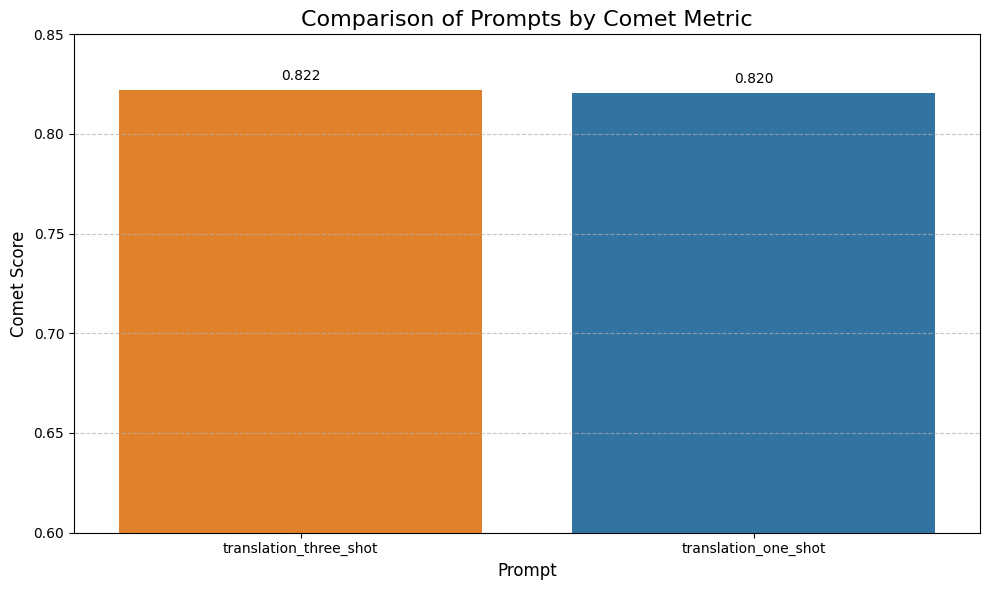

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3976971562.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


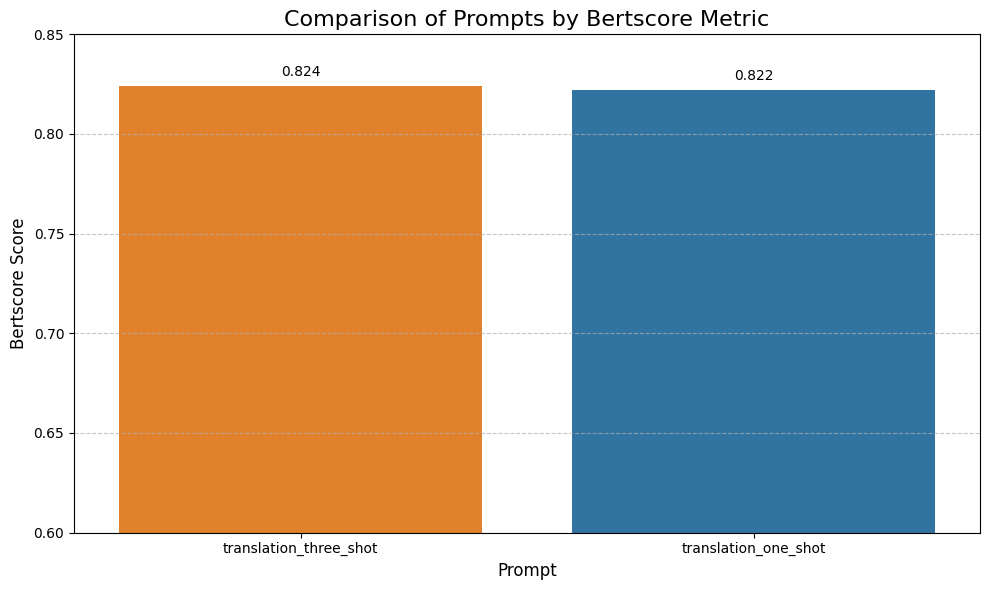

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3976971562.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


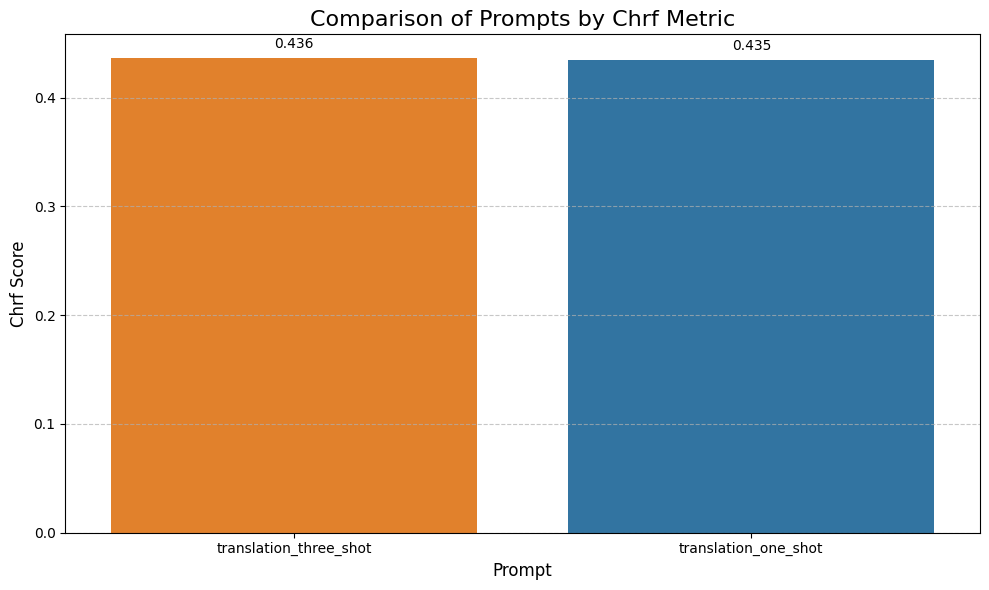

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3976971562.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


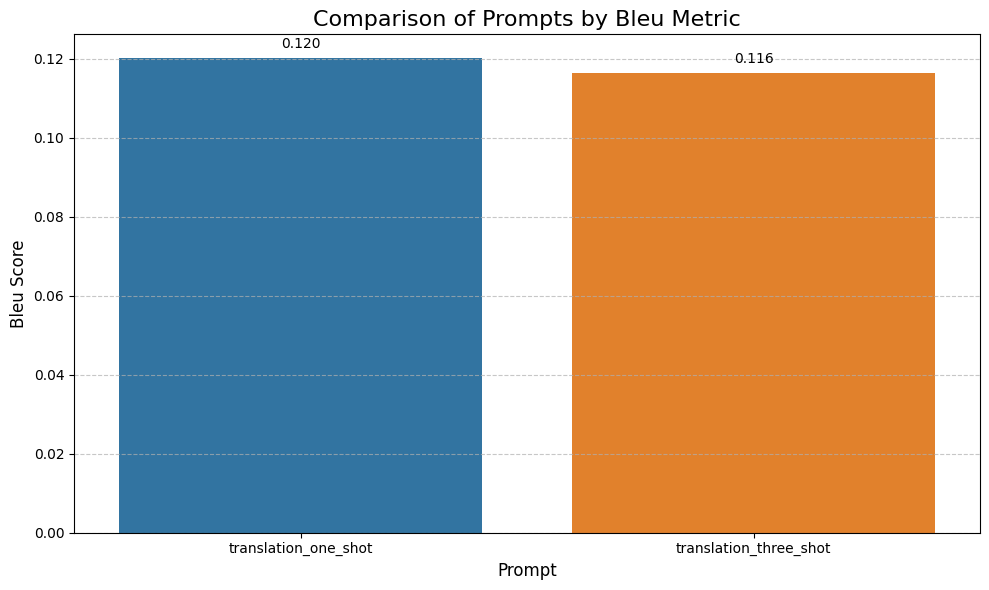

In [48]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in new_system_extraction_comparison.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in new_system_extraction_comparison.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = new_system_extraction_comparison[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [42]:
all_extraction_comparison = pd.read_csv("translations_scores/new_extraction_comparision_basic_metric.csv")

In [43]:
sorted_df = all_extraction_comparison.sort_values(by='comet_translation_one_shot', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_translation_one_shot', 'translation_one_shot', 'en_text', 'pl_text']]

result

,comet_translation_one_shot,translation_one_shot,en_text,pl_text
771,0.353099,Już byłem/byłam tutaj.,I been already. They said their herbs can't he...,"Już byłam. Powiedzieli, że ich zioła już nic n..."
871,0.365916,Po prostu wcinam rzeczy... lub nie.,Just wolfin' things down… or not.,"Nie wywołuj wilka z lasu, bo..."
642,0.366626,"Niech Nilf spadnie, przekażcie go dalej, dziew...","A Nilf goes down, pass 'im around, ninety-nine...","Kto nie skacze, ten z Nilfgaardu, hej, hej, hej!"
591,0.374773,Mm-mm. Według gatunków. Dusiciel jest mniej ni...,Mm-mm. By species. Drowner's less than a cocka...,"Zależy od gatunku. Za utopca mniej, za kurolis..."
889,0.384411,"Wiem, że długa łódź...",I… I know that longship…,Ja... znam ten drakkar...


In [44]:
for index, row in top_5_lowest.iterrows():
    print(f"comet_translation_one_shot: {row['comet_translation_one_shot']}")
    print(f"result_one_shot: {row['result_one_shot']}")
    print(f"translation_one_shot: {row['translation_one_shot']}")
    print(f"en_text: {row['en_text']}")
    print(f"pl_text: {row['pl_text']}")
    print()


comet_translation_one_shot: 0.3530987203121185
result_one_shot: Zdanie po angielsku: I been already. They said their herbs can't help, and all that's left is to pray.

Tłumaczenie: [Już byłem/byłam tutaj.] [Powiedzieli, że ich zioła nie mogą pomóc, i pozostało tylko się modlić.]

Warto zauważyć, że drugie zdanie zawiera kilka błędów gramatycznych i składniowych w oryginalnym tekście. Poprawiona wersja brzmiałaby: "I have been here already. They said their herbs can't help, and all that's left is to pray." Tłumaczenie uwzględniające te poprawki:

[Już tu byłem/byłam.] [Powiedzieli, że ich zioła nie mogą pomóc, i pozostało tylko się modlić.]
translation_one_shot: Już byłem/byłam tutaj.
en_text: I been already. They said their herbs can't help, and all that's left is to pray.
pl_text: Już byłam. Powiedzieli, że ich zioła już nic nie wskórają. Że już tylko modlitwa zostaje.

comet_translation_one_shot: 0.3659159243106842
result_one_shot: Zdanie po angielsku: Just wolfin' things down… or no

In [51]:
sorted_df = all_extraction_comparison.sort_values(by='comet_translation_three_shot', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_translation_three_shot', 'translation_three_shot', 'en_text', 'pl_text']]

result

,comet_translation_three_shot,translation_three_shot,en_text,pl_text
139,0.346582,"Wisząc na tobie, kolego?","Hangin' by, mate?","Co tam, brachu?"
889,0.384411,"Wiem, że długa łódź...",I… I know that longship…,Ja... znam ten drakkar...
634,0.406646,"Po tobie, potem.","After you, then.",No to prowadź.
871,0.434503,Po prostu rzucam rzeczy na dół... albo nie.,Just wolfin' things down… or not.,"Nie wywołuj wilka z lasu, bo..."
642,0.435928,Na rzece Nil płynie statek pełen dziewięćdzies...,"A Nilf goes down, pass 'im around, ninety-nine...","Kto nie skacze, ten z Nilfgaardu, hej, hej, hej!"


In [52]:
for index, row in top_5_lowest.iterrows():
    print(f"comet_translation_one_shot: {row['comet_translation_three_shot']}")
    print(f"result_one_shot: {row['result_three_shot']}")
    print(f"translation_one_shot: {row['translation_three_shot']}")
    print(f"en_text: {row['en_text']}")
    print(f"pl_text: {row['pl_text']}")
    print()


comet_translation_one_shot: 0.3465820848941803
result_one_shot: [Wisząc na tobie, kolego?]

To zdanie "Hangin' by, mate?" jest potoczne i może być używane jako żartobliwe pytanie lub komentarz, sugerujący, że ktoś polega na innej osobie w sposób nadmierny lub nieodpowiedni. W języku polskim najlepiej oddać jego znaczenie poprzez użycie sformułowania "wisząc na tobie", co odnosi się do metaforycznego obciążenia kogoś swoimi problemami lub oczekiwaniami.
translation_one_shot: Wisząc na tobie, kolego?
en_text: Hangin' by, mate?
pl_text: Co tam, brachu?

comet_translation_one_shot: 0.384410947561264
result_one_shot: Zdanie po angielsku: I... I know that longship...

Tłumaczenie: [Wiem, że długa łódź...]

Niestety, podane zdanie jest niekompletne i brakuje kluczowego elementu, który pozwoliłby na pełne tłumaczenie. Jeśli możesz podać pełne zdanie lub kontekst, mogę pomóc w jego dokładniejszym przetłumaczeniu.
translation_one_shot: Wiem, że długa łódź...
en_text: I… I know that longship…
pl_

In [47]:
new_comparision = pd.concat([system_extraction_comparison, new_system_extraction_comparison], axis=1)

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3629585055.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


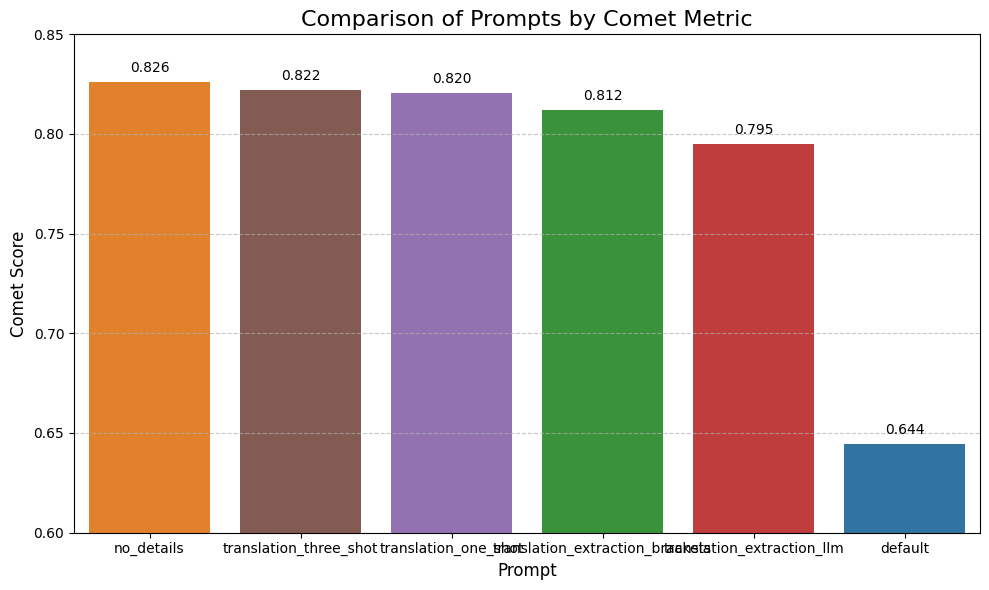

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3629585055.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


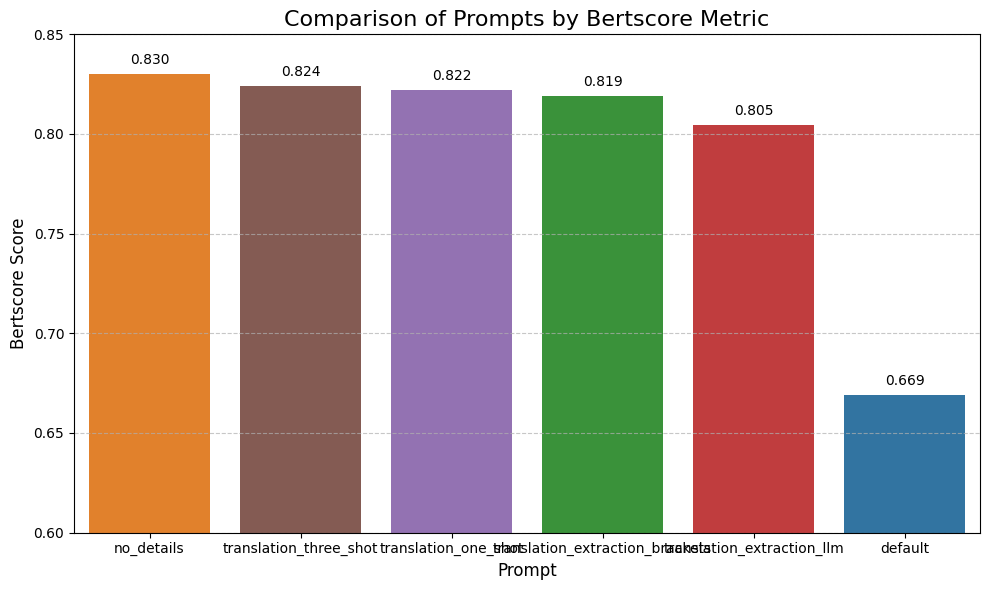

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3629585055.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


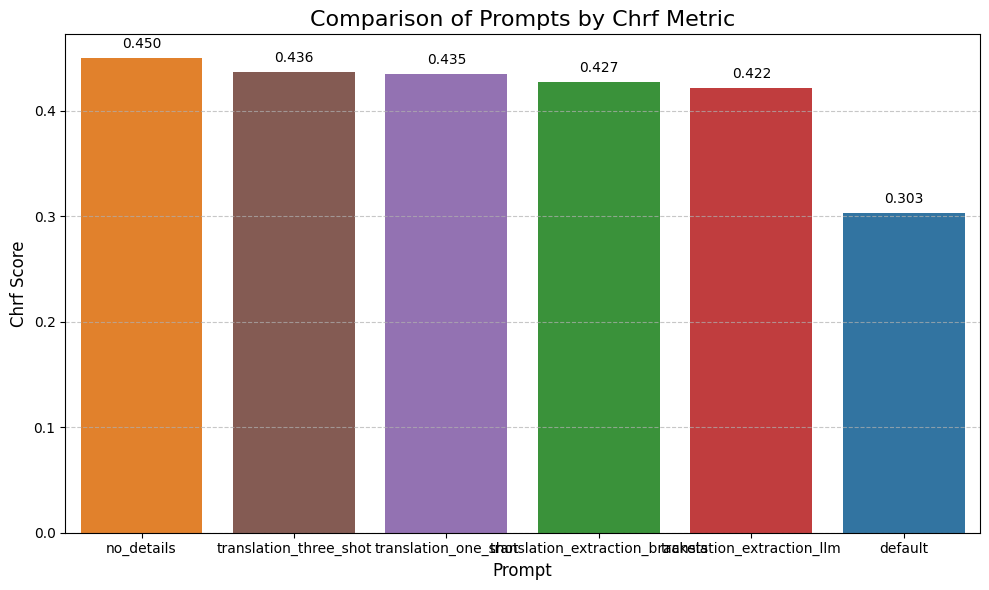

C:\Users\kajet\AppData\Local\Temp\ipykernel_22860\3629585055.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


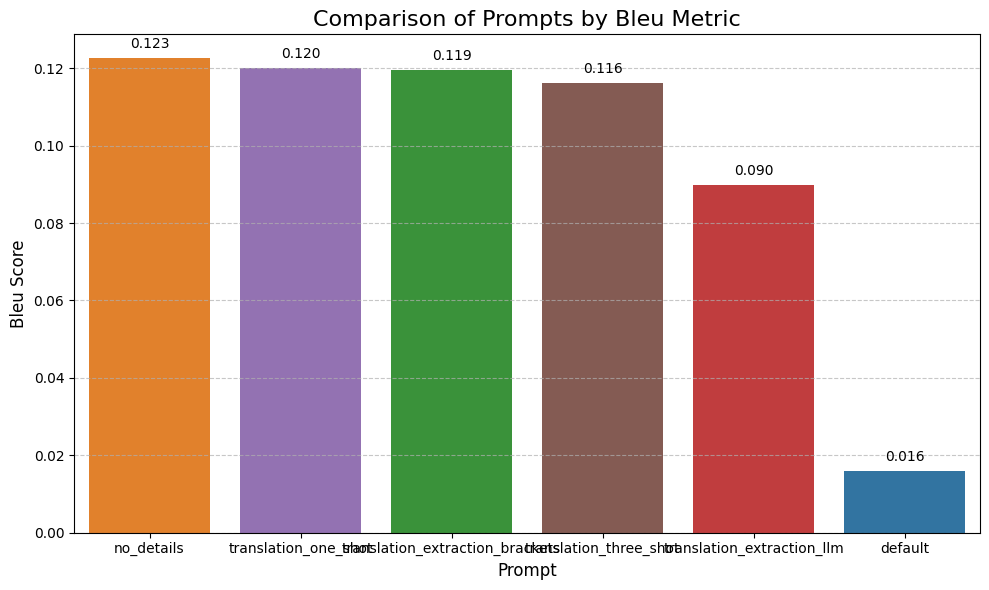

In [ ]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in new_comparision.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in new_comparision.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = new_comparision[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()